In [17]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn

#
# by: Emily Mo
# on Feb 21, 2019
# 

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load_df = pd.read_csv(city_data_to_load)
ride_data_to_load_df= pd.read_csv(ride_data_to_load)

city_data_to_load_df.head()
ride_data_to_load_df.head()

# Combine the data into a single dataset
city_ride_df = pd.merge(ride_data_to_load_df,city_data_to_load_df, how='outer', on=("city"))

# Display the data table for preview
city_ride_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [18]:
# group by city type - urban, suburban and rural :
    
city_type_df = city_ride_df.groupby("type")


city_type_df=pd.DataFrame({
    "ride count" : city_type_df["ride_id"].count(),
    "avg fare" : city_type_df["fare"].mean(),
    "total fare" : city_type_df["fare"].sum()
    })

city_type_df.head()

,ride count,avg fare,total fare
type,,,
Rural,125,34.623440,4327.93
Suburban,625,30.970128,19356.33
Urban,1625,24.525772,39854.38


In [19]:
# just rural data :

rural_df = city_ride_df.loc[city_ride_df["type"]=='Rural']
rural_df

rural_city_count = rural_df["city"].value_counts()

print(rural_city_count)

rural_city_df = rural_df.groupby("city")

rural_city_df = pd.DataFrame({
    "rural-ride_count" : rural_city_df["ride_id"].count(),
    "rural-avg_fare" : rural_city_df["fare"].mean(),
    "rural-drivers" : rural_city_df["driver_count"].mean()
    })
rural_city_df.head()


Michaelberg          12
Lake Latoyabury      11
Bradshawfurt         10
North Holly           9
West Heather          9
North Jaime           8
South Marychester     8
South Jennifer        7
Jessicaport           6
New Ryantown          6
Lake Jamie            6
Harringtonfort        6
Taylorhaven           6
Randallchester        5
Penaborough           5
South Saramouth       4
Newtonview            4
Garzaport             3
Name: city, dtype: int64


,rural-ride_count,rural-avg_fare,rural-drivers
city,,,
Bradshawfurt,10,40.064000,7
Garzaport,3,24.123333,7
Harringtonfort,6,33.470000,4
Jessicaport,6,36.013333,1
Lake Jamie,6,34.358333,4


In [20]:
# just urban data :

urban_df = city_ride_df.loc[city_ride_df["type"]=='Urban']
urban_df

urban_city_count = urban_df["city"].value_counts()

print(urban_city_count)

urban_city_df = urban_df.groupby("city")

urban_city_df = pd.DataFrame({
    "urban-ride_count" : urban_city_df["ride_id"].count(),
    "urban-avg_fare" : urban_city_df["fare"].mean(),
    "urban-drivers" : urban_city_df["driver_count"].mean()

    })
urban_city_df.head()


West Angela             39
South Karenland         38
North Jason             35
Liumouth                33
Port Frank              33
West Robert             31
South Evanton           31
South Phillip           31
South Michelleport      31
Justinberg              30
Royland                 30
New Kimberlyborough     30
North Jasmine           30
West Anthony            30
East Kaylahaven         29
Richardfort             28
West Heidi              28
Hurleymouth             28
Karenside               28
Loganberg               28
Christopherfurt         27
Carriemouth             27
West Christopherberg    26
Lake Danielberg         26
West Josephberg         26
North Madeline          25
Raymondhaven            25
Jerryton                25
Port Samanthamouth      25
Grahamburgh             25
                        ..
Martinezhaven           24
Simpsonburgh            24
Williamsstad            23
West Gabriel            23
Rodneyfort              23
Port Johnbury           22
R

,urban-ride_count,urban-avg_fare,urban-drivers
city,,,
Amandaburgh,18,24.641667,12
Barajasview,22,25.332273,26
Carriemouth,27,28.314444,52
Christopherfurt,27,24.501852,41
Deanville,19,25.842632,49


In [21]:
# just suburban data :
suburban_df = city_ride_df.loc[city_ride_df["type"]=='Suburban']
suburban_df

suburban_city_count = suburban_df["city"].value_counts()

print(suburban_city_count)

suburban_city_df = suburban_df.groupby("city")

suburban_city_df = pd.DataFrame({
    "suburban-ride_count" : suburban_city_df["ride_id"].count(),
    "suburban-avg_fare" : suburban_city_df["fare"].mean(),
    "suburban-drivers" : suburban_city_df["driver_count"].mean()
    })
suburban_city_df.head()


Josephside            27
East Marymouth        27
Lake Robertside       25
South Brenda          24
South Teresa          22
Colemanland           22
New Raymond           22
West Hannah           21
West Kimmouth         20
Brandonfort           19
Port Shane            19
Nicolechester         19
Lake Scott            18
Bethanyland           18
Lewisland             17
Veronicaberg          17
Davidfurt             17
Mezachester           17
New Olivia            17
New Shannonberg       17
East Danielview       17
Barronchester         16
Myersshire            16
North Timothy         15
Rodriguezview         15
Grayville             15
Victoriaport          14
Lake Omar             14
Williamsonville       14
North Richardhaven    14
East Kentstad         13
North Jeffrey         13
Lake Ann              12
Lewishaven            12
Sotoville             11
East Aaronbury         9
Name: city, dtype: int64


,suburban-ride_count,suburban-avg_fare,suburban-drivers
city,,,
Barronchester,16,36.422500,11
Bethanyland,18,32.956111,22
Brandonfort,19,35.437368,10
Colemanland,22,30.894545,23
Davidfurt,17,31.995882,23


In [22]:
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F88379'}

39


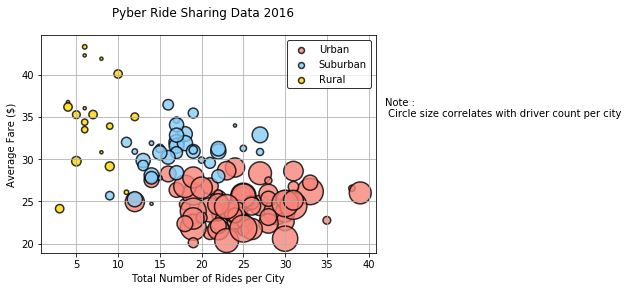

In [25]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


# Create a scatter plot

plt.suptitle("Pyber Ride Sharing Data 2016")
plt.text(42,35, "Note : \n Circle size correlates with driver count per city")

city_color = {'Rural': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Urban': color_scheme['Light Coral']}


three_limits = [rural_city_df["rural-ride_count"].max(), urban_city_df["urban-ride_count"].max(), suburban_city_df["suburban-ride_count"].max()]
max_limit = max(three_limits)
print(max_limit)
three_fares = [rural_city_df["rural-avg_fare"].max(), urban_city_df["urban-avg_fare"].max(), suburban_city_df["suburban-avg_fare"].max()]
max_fare = max(three_fares)

x_axis = np.arange(0, max_limit+5, 1)

plt.xlim=(0, max_limit+5)
plt.ylim=(0, max_fare+5)

plt.scatter(urban_city_df['urban-ride_count'], urban_city_df['urban-avg_fare'], s = urban_city_df['urban-drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .8, linewidths =1.5)
plt.scatter(suburban_city_df['suburban-ride_count'], suburban_city_df['suburban-avg_fare'], s = suburban_city_df['suburban-drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .8, linewidths =1.5)
plt.scatter(rural_city_df['rural-ride_count'], rural_city_df['rural-avg_fare'], s = rural_city_df['rural-drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .8, linewidths =1.5)
              
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.grid()

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [35]
lgnd.legendHandles[1]._sizes = [35]
lgnd.legendHandles[2]._sizes = [35]


plt.savefig("Images/BubblePlotRideSharingData.png")

In [26]:
# Show plot
plt.show()

## Total Fares by City Type

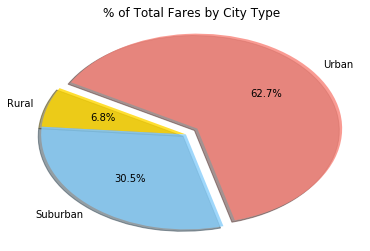

In [27]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure

rural = city_ride_df.loc[city_ride_df['type']=="Rural"]
urban = city_ride_df.loc[city_ride_df['type']=="Urban"]
suburban = city_ride_df.loc[city_ride_df['type']=="Suburban"]


grand_total_fare = city_type_df["total fare"].sum()


rural_perc = rural["fare"].sum() / grand_total_fare
urban_perc = urban['fare'].sum() / grand_total_fare
suburban_perc = suburban['fare'].sum() / grand_total_fare

labels = ["Urban", "Rural","Suburban"]

# The values of each section of the pie chart
sizes = [urban_perc, rural_perc, suburban_perc]

# The colors of each section of the pie chart
colors = [color_scheme['Light Coral'], color_scheme['Gold'],color_scheme['Light Sky Blue'] ]

explode = (0.1, 0, 0 )
          
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle = 285, wedgeprops={'alpha':0.8})
plt.title("% of Total Fares by City Type")
plt.axis("auto")

plt.savefig("Images/TotalFaresbyCityType.png")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

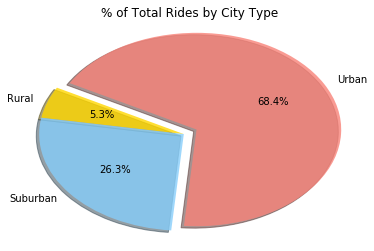

In [28]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


urban_ride_count = urban_city_df["urban-ride_count"].sum()
suburban_ride_count = suburban_city_df["suburban-ride_count"].sum()
rural_ride_count = rural_city_df["rural-ride_count"].sum()

grand_total_ride = urban_ride_count + suburban_ride_count + rural_ride_count

rural_ride_perc = rural_ride_count / grand_total_ride
urban_ride_perc = urban_ride_count / grand_total_ride
suburban_ride_perc = suburban_ride_count / grand_total_ride

labels = ["Urban", "Rural","Suburban"]

# The values of each section of the pie chart
sizes = [urban_ride_perc, rural_ride_perc, suburban_ride_perc]

# The colors of each section of the pie chart
colors = [color_scheme['Light Coral'], color_scheme['Gold'],color_scheme['Light Sky Blue'] ]


explode = (0.1, 0, 0 )
          
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle = 265, wedgeprops={'alpha':0.8})
plt.title("% of Total Rides by City Type")

plt.axis("auto")

plt.savefig("Images/TotalRidesbyCityType.png")


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

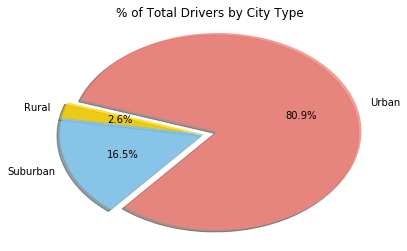

In [32]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure

urban_driver_count = urban_city_df["urban-drivers"].sum()
suburban_driver_count = suburban_city_df["suburban-drivers"].sum()
rural_driver_count = rural_city_df["rural-drivers"].sum()

grand_total_driver = urban_driver_count + suburban_driver_count + rural_driver_count

rural_driver_perc = rural_driver_count / grand_total_driver
urban_driver_perc = urban_driver_count / grand_total_driver
suburban_driver_perc = suburban_driver_count / grand_total_driver

labels = ["Urban", "Rural","Suburban"]

# The values of each section of the pie chart
sizes = [urban_driver_perc, rural_driver_perc, suburban_driver_perc]

# The colors of each section of the pie chart
colors = [color_scheme['Light Coral'], color_scheme['Gold'],color_scheme['Light Sky Blue'] ]

explode = (0.1, 0, 0 )
          
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle = 230, wedgeprops={'alpha':0.8})
plt.title("% of Total Drivers by City Type")


plt.axis("auto")

plt.savefig("Images/TotalDriversbyCityType.png")

In [30]:
# Show Figure
plt.show()